<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>Benjamin Pang</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 2</span>
# <span style="color:green">Network of Co-Occurring Words (Word-Net) in Sentences of the Text

In [1]:
import time
start_time = time.time()
import urllib, os, codecs, random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt
from collections import Counter
from string import punctuation, digits
import pathlib
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')
import inflect
import nltk
from nltk import word_tokenize
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx
from wordcloud import WordCloud
import matplotlib as mpl
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Load Data

In [2]:
# get your working directory
home = str(pathlib.Path.cwd())

# create a path to which the file will be written
text_path = os.path.join(home, 'pride_and_prejudice.txt')

# location of the project gutenberg copy of the moby-dick text file
# text_url = 'http://www.gutenberg.org/files/1342/1342-0.txt'

# urllib.request.urlretrieve(text_url, text_path)

print('Downloaded to:', text_path)

Downloaded to: /home/ben/idh/hw2/pride_and_prejudice.txt


In [3]:
f = codecs.open(text_path, "r", encoding="utf-8").readlines()
start, end = 0, 0
for line in f:
    if line.startswith("      It is a truth universally acknowledged"):
        start = f.index(line) - 2
        print(start)
    if line.startswith("      uniting them."):
        end = f.index(line) + 1
        print(end)

167
14227


In [4]:
ff=f[start:end]
ff

['      Chapter 1\r\n',
 '\r\n',
 '      It is a truth universally acknowledged, that a single man in\r\n',
 '      possession of a good fortune, must be in want of a wife.\r\n',
 '\r\n',
 '      However little known the feelings or views of such a man may be\r\n',
 '      on his first entering a neighbourhood, this truth is so well\r\n',
 '      fixed in the minds of the surrounding families, that he is\r\n',
 '      considered the rightful property of some one or other of their\r\n',
 '      daughters.\r\n',
 '\r\n',
 '      “My dear Mr. Bennet,” said his lady to him one day, “have you\r\n',
 '      heard that Netherfield Park is let at last?”\r\n',
 '\r\n',
 '      Mr. Bennet replied that he had not.\r\n',
 '\r\n',
 '      “But it is,” returned she; “for Mrs. Long has just been here, and\r\n',
 '      she told me all about it.”\r\n',
 '\r\n',
 '      Mr. Bennet made no answer.\r\n',
 '\r\n',
 '      “Do you not want to know who has taken it?” cried his wife\r\n',
 '      impatiently

In [5]:
ff[-10:]

['      see how his wife conducted herself; and she condescended to wait\r\n',
 '      on them at Pemberley, in spite of that pollution which its woods\r\n',
 '      had received, not merely from the presence of such a mistress,\r\n',
 '      but the visits of her uncle and aunt from the city.\r\n',
 '\r\n',
 '      With the Gardiners, they were always on the most intimate terms.\r\n',
 '      Darcy, as well as Elizabeth, really loved them; and they were\r\n',
 '      both ever sensible of the warmest gratitude towards the persons\r\n',
 '      who, by bringing her into Derbyshire, had been the means of\r\n',
 '      uniting them.\r\n']

In [6]:
text="\r\n".join(ff)
text

'      Chapter 1\r\n\r\n\r\n\r\n      It is a truth universally acknowledged, that a single man in\r\n\r\n      possession of a good fortune, must be in want of a wife.\r\n\r\n\r\n\r\n      However little known the feelings or views of such a man may be\r\n\r\n      on his first entering a neighbourhood, this truth is so well\r\n\r\n      fixed in the minds of the surrounding families, that he is\r\n\r\n      considered the rightful property of some one or other of their\r\n\r\n      daughters.\r\n\r\n\r\n\r\n      “My dear Mr. Bennet,” said his lady to him one day, “have you\r\n\r\n      heard that Netherfield Park is let at last?”\r\n\r\n\r\n\r\n      Mr. Bennet replied that he had not.\r\n\r\n\r\n\r\n      “But it is,” returned she; “for Mrs. Long has just been here, and\r\n\r\n      she told me all about it.”\r\n\r\n\r\n\r\n      Mr. Bennet made no answer.\r\n\r\n\r\n\r\n      “Do you not want to know who has taken it?” cried his wife\r\n\r\n      impatiently.\r\n\r\n\r\n\r\n      

In [7]:
titlename = "Jane Austen's Pride & Prejudice"

words = word_tokenize(text)
nuw=len(words)
uw=len(set(words))
print("%s contains %i nonunique and %i unique words"%(titlename,nuw,uw))

Jane Austen's Pride & Prejudice contains 142525 nonunique and 7785 unique words


### Extraction of Proper Nouns

In [8]:
p = inflect.engine()
d_tags = {}

docs_d={"Pride and Prejudice":text}
for key, value in docs_d.items():
    arr = []
    doc = nlp(value.replace('\n',''))
    #Keep these types of nlp entities
    keep_l = ['PERSON'] #,'NORP','PRODUCT','ORG']
    #Typo/model error + german corrections
    drop_t = []
    
    #Things inflect library handles poorly or to exclude from touching
    ex_ls = []
    
    for X in doc.ents:
        s1 = X.text
        if (X.label_ in keep_l) and (s1.lower() not in drop_t) and (s1):
            arr.append((s1, X.label_))
    d_tags[key] = arr
# pprint(d_tags)
names=[]
for k,v in d_tags.items():
    for vv in v:
        if vv[0] not in names:
            p=vv[0].replace("'","")
            p=p.title()
            names.append(p)
names=sorted(set(names))
print(len(names))
names

156


['Anne',
 'Annesley',
 'Ashworth',
 'Bakewell',
 'Bennet',
 'Bennets',
 'Bingley',
 'Bingleys',
 'Boulanger',
 'Bourgh',
 'Bromley',
 'Caroline',
 'Caroline Bingley',
 'Carter',
 'Cassino',
 'Catherine',
 'Catherine De Bourgh',
 'Chamberlayne',
 'Charles',
 'Charlotte',
 'Charlotte Dine',
 'Charlotte Lucas',
 'Clarke',
 'Clement',
 'Collins',
 'Collinses',
 'Covies',
 'Darcy',
 'Darcy\r\r      ',
 'Darcy!—And',
 'Darcy:—But',
 'Darcy_',
 'Dawson',
 'De Bourgh',
 'Denny',
 'Dove Dale',
 'Dwelt',
 'Earth!—Of',
 'Eliza',
 'Eliza Bennet',
 'Elizabeth',
 'Elizabeth Bennet',
 'Epsom',
 'Esq',
 'Evening Elizabeth',
 'F.',
 'Fitzwilliam',
 'Fitzwilliam Darcy',
 'Follies',
 'Forster',
 'Forsters',
 'Gardiner',
 'Gardiners',
 'Gentlemanlike Man',
 'George',
 'George Wickham',
 'Georgiana',
 'Georgiana Darcy',
 'Gouldings',
 'Grantley',
 'Hackney',
 'Haggerston',
 'Harriet',
 'Hatfield',
 'Hertfordshire',
 'Hill',
 'Hunsford',
 'Hunsford Parsonage',
 'Hurst',
 'I.”\r\r\r\r      ',
 'Jane',
 'Jane

In [9]:
rem=[]
for p in names:
    if "_" in p:
        rem.append(p)
    if "--" in p:
        rem.append(p)
    if p not in text:
        rem.append(p)
names=[p for p in names if p not in rem]
pp=[q for q in itertools.product(names,names) if q[0]!=q[1]]
for q in pp:
    if q[0] in q[1]:
        rem.append(q[0])
    if q[1] in q[0]:
        rem.append(q[1])
    w=q[0]+" "+q[1]
    if w in text:
        names.append(w)
        rem.append(q[0])
        rem.append(q[1])
names=[p for p in names if p not in rem]
names=sorted(set(names))
print(len(names))
sorted(names)

81


['Annesley',
 'Ashworth',
 'Bakewell',
 'Bennets',
 'Bingleys',
 'Boulanger',
 'Bourgh',
 'Bromley',
 'Caroline Bingley',
 'Carter',
 'Chamberlayne',
 'Charles',
 'Charlotte Lucas',
 'Clarke',
 'Clement',
 'Collinses',
 'Dawson',
 'Denny',
 'Dove Dale',
 'Eliza Bennet',
 'Elizabeth Bennet',
 'Epsom',
 'Esq',
 'F.',
 'Fitzwilliam Darcy',
 'Follies',
 'Forsters',
 'Gardiners',
 'George Wickham',
 'Georgiana Darcy',
 'Gouldings',
 'Grantley',
 'Haggerston',
 'Harriet',
 'Hatfield',
 'Hertfordshire',
 'Hill',
 'Hunsford Parsonage',
 'Hurst',
 'Jane Bennet',
 'Jenkinson',
 'John',
 'Jones',
 'Kitty',
 'Lady Anne',
 'Lady Catherine',
 'Lady Lucas',
 'Lizzy',
 'Longbourn House',
 'Louisa',
 'Lucas Lodge',
 'Lucases',
 'Lydia Bennet',
 'Lydia Wickham',
 'Maria Lucas',
 'Mary King',
 'Meryton',
 'Michaelmas',
 'Miller',
 'Miss Bingley',
 'Morris',
 'Nay',
 'Netherfield',
 'Nicholls',
 'Niece',
 'Pemberley Woods',
 'Phillips',
 'Pratt',
 'Reynolds',
 'Richard',
 'Robinson',
 'Rosings',
 'Sally',

In [10]:
rem=['Esq', 'F.', 'Follies', 'Nay', 'Niece', 'Till Elizabeth', 'W.']
names=[p for p in names if p not in rem]
names=names+['Bingley', 'Caroline', 'Charlotte', 'Collins', 'Darcy', 'Eliza', 'Elizabeth', 'Fitzwilliam', 'George', 'Georgiana', 'Hunsford', 'Jane', 'Longbourn', 'Lydia', 'Maria', 'Mary', 'Pemberley', 'William', 'Wickham']
    
        
names=sorted(set(names)) 
print(len(names))
names

93


['Annesley',
 'Ashworth',
 'Bakewell',
 'Bennets',
 'Bingley',
 'Bingleys',
 'Boulanger',
 'Bourgh',
 'Bromley',
 'Caroline',
 'Caroline Bingley',
 'Carter',
 'Chamberlayne',
 'Charles',
 'Charlotte',
 'Charlotte Lucas',
 'Clarke',
 'Clement',
 'Collins',
 'Collinses',
 'Darcy',
 'Dawson',
 'Denny',
 'Dove Dale',
 'Eliza',
 'Eliza Bennet',
 'Elizabeth',
 'Elizabeth Bennet',
 'Epsom',
 'Fitzwilliam',
 'Fitzwilliam Darcy',
 'Forsters',
 'Gardiners',
 'George',
 'George Wickham',
 'Georgiana',
 'Georgiana Darcy',
 'Gouldings',
 'Grantley',
 'Haggerston',
 'Harriet',
 'Hatfield',
 'Hertfordshire',
 'Hill',
 'Hunsford',
 'Hunsford Parsonage',
 'Hurst',
 'Jane',
 'Jane Bennet',
 'Jenkinson',
 'John',
 'Jones',
 'Kitty',
 'Lady Anne',
 'Lady Catherine',
 'Lady Lucas',
 'Lizzy',
 'Longbourn',
 'Longbourn House',
 'Louisa',
 'Lucas Lodge',
 'Lucases',
 'Lydia',
 'Lydia Bennet',
 'Lydia Wickham',
 'Maria',
 'Maria Lucas',
 'Mary',
 'Mary King',
 'Meryton',
 'Michaelmas',
 'Miller',
 'Miss Bingle

In [11]:
nfreq=[]
for i in names: 
    nfreq.append(text.count(i))
pnf_df = pd.DataFrame(
    {'Proper Nouns': names, 
     'Frequency of Occurrences': nfreq
    })
pnf_df=pnf_df[['Proper Nouns','Frequency of Occurrences']]
pnf_df=pnf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
# trf_df=trf_df[trf_df["Frequency of Occurrences"]>10]
print(len(pnf_df))
pnf_df[:50]

93


,Proper Nouns,Frequency of Occurrences
24,Eliza,657
26,Elizabeth,635
20,Darcy,417
4,Bingley,310
47,Jane,291
88,Wickham,194
18,Collins,184
62,Lydia,170
54,Lady Catherine,103
56,Lizzy,96


In [12]:
pnf_df.to_csv('Names_freqs.csv')

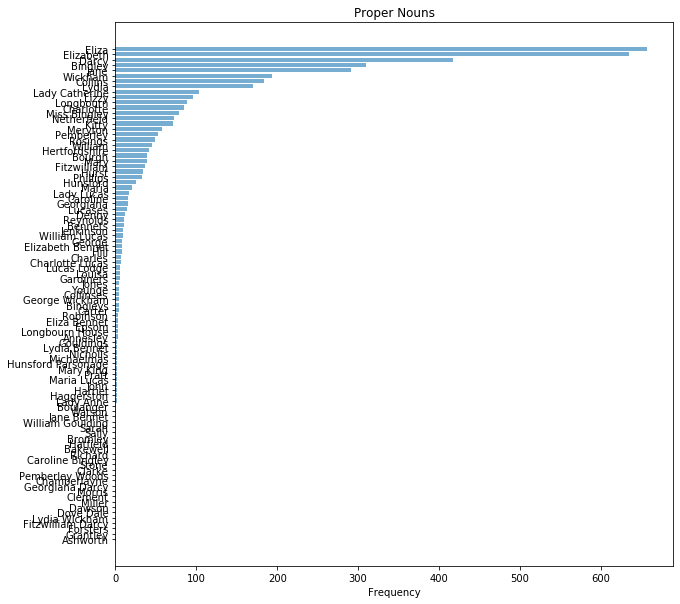

In [13]:
x = pnf_df.set_index('Proper Nouns').T.to_dict() 
x=sorted([(k,v['Frequency of Occurrences']) for k,v in x.items()], key=lambda x: x[1],reverse=True)
keys = [i for (i,j) in x] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in x] 
plt.figure(figsize=(10,10))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Frequency')
plt.title('Proper Nouns')
plt.show()

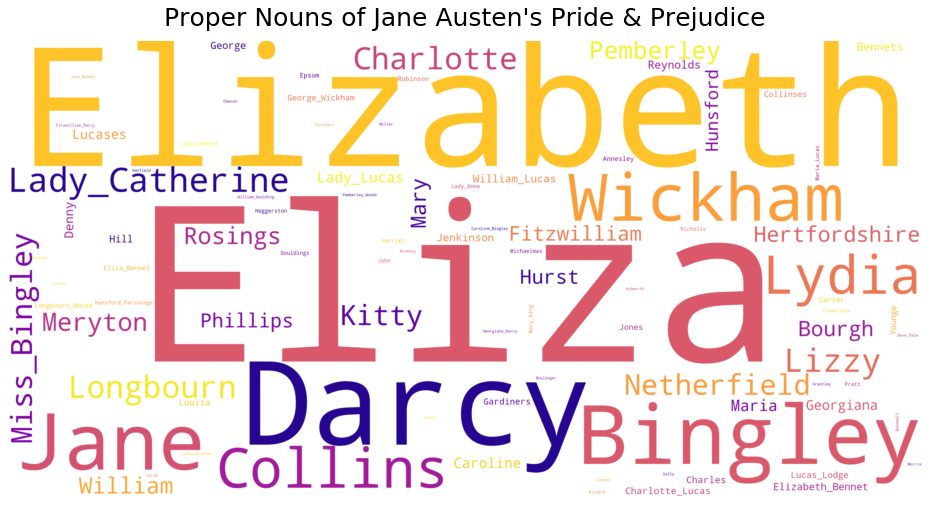

In [14]:
t=[]
for (i,j) in x:
    for k in range(j):
#         print i.replace(" ","_").replace("-","_")
        t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Proper Nouns of %s" %titlename
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4]) 
plt.show()

### Dictionary of Aliased Proper Nouns

In [15]:
alias_dict={}
for n in names:
    if n in ["Elizabeth", "Eliza", "Elizabeth Bennet", "Eliza Bennet"]:
        alias_dict[n]="Elizabeth"
    elif n in ["Jane", "Jane Bennet"]:
        alias_dict[n]="Jane"
    elif n in ["Lydia", "Lydia Bennet", "Lydia Wickham"]:
        alias_dict[n]="Lydia"
    elif n in ["Charles", "Charles Bingley"]:
        alias_dict[n]="Bingley"
    elif n in ["Caroline", "Caroline Bingley", "Miss Bingley"]:
        alias_dict[n]="Caroline"
    elif n in ["Fitzwilliam", "Darcy", "Fitzwilliam Darcy"]:
        alias_dict[n]="Darcy"
    elif n in ["Charlotte", "Charlotte Lucas"]:
        alias_dict[n]="Charlotte"
    elif n in ["Maria", "Maria Lucas"]:
        alias_dict[n]="Maria"
    elif n in ["George", "Wickham", "George Wickham"]:
        alias_dict[n]="Wickham"
    else:
        alias_dict[n]=n
print("The dictionary of aliases has %i keys (names) and %i unique values (aliased proper nouns)" %(len(alias_dict.keys()),len(set(alias_dict.values()))))
# for k,v in alias_dict.items():
#     print(k,"-->",v)

The dictionary of aliases has 93 keys (names) and 78 unique values (aliased proper nouns)


### The Network of Sententially Co-Occurring Proper Names ("Word-Net")

In [16]:
blob = TextBlob(text)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("%s contains %i sentential co-occurrences among %i aliased proper nouns"%(titlename,len(medges),len(set(alias_dict.values()))))
medges

Jane Austen's Pride & Prejudice contains 1609 sentential co-occurrences among 78 aliased proper nouns


[('Bingley', 'Michaelmas', 'Sentence_6', 0.12118055555555553),
 ('Morris', 'Bingley', 'Sentence_6', 0.12118055555555553),
 ('Netherfield', 'Morris', 'Sentence_6', 0.12118055555555553),
 ('Netherfield', 'Bingley', 'Sentence_6', 0.12118055555555553),
 ('Morris', 'Michaelmas', 'Sentence_6', 0.12118055555555553),
 ('Netherfield', 'Michaelmas', 'Sentence_6', 0.12118055555555553),
 ('William', 'Lady Lucas', 'Sentence_18', -0.22499999999999998),
 ('Bingley', 'Lizzy', 'Sentence_20', 0.19249999999999998),
 ('Jane', 'Lydia', 'Sentence_21', 0.2833333333333333),
 ('Lizzy', 'Lydia', 'Sentence_21', 0.2833333333333333),
 ('Jane', 'Lizzy', 'Sentence_21', 0.2833333333333333),
 ('Elizabeth', 'Bingley', 'Sentence_36', -0.02),
 ('Elizabeth', 'Lizzy', 'Sentence_36', -0.02),
 ('Bingley', 'Lizzy', 'Sentence_36', -0.02),
 ('Bingley', 'Lizzy', 'Sentence_42', -0.32857142857142857),
 ('Mary', 'Bingley', 'Sentence_51', -0.7142857142857143),
 ('Bingley', 'Lydia', 'Sentence_63', 0.17500000000000002),
 ('Netherfield

In [17]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of sententially co-occurrent proper nouns in %s is a weighted graph and it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The proper names which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
giant = max((Gw.subgraph(c) for c in nx.connected_components(Gw)), key=len)
Gwlcc=Gw.subgraph(giant)
print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent proper nouns in Jane Austen's Pride & Prejudice is a weighted graph and it has 67 nodes and 364 edges 

The proper names which do not co-occur in sentences are: 
 Bakewell
 Bromley
 Chamberlayne
 Dove Dale
 Forsters
 Grantley
 Haggerston
 Harriet
 Miller
 Sarah
 Stone

The density of this graph is 0.165
This graph is a disconnected graph and it has 2 connected components
The largest connected component of this graph is a weighted graph with 65 nodes and 363 edges
The density of the largest connected component of this graph is 0.175


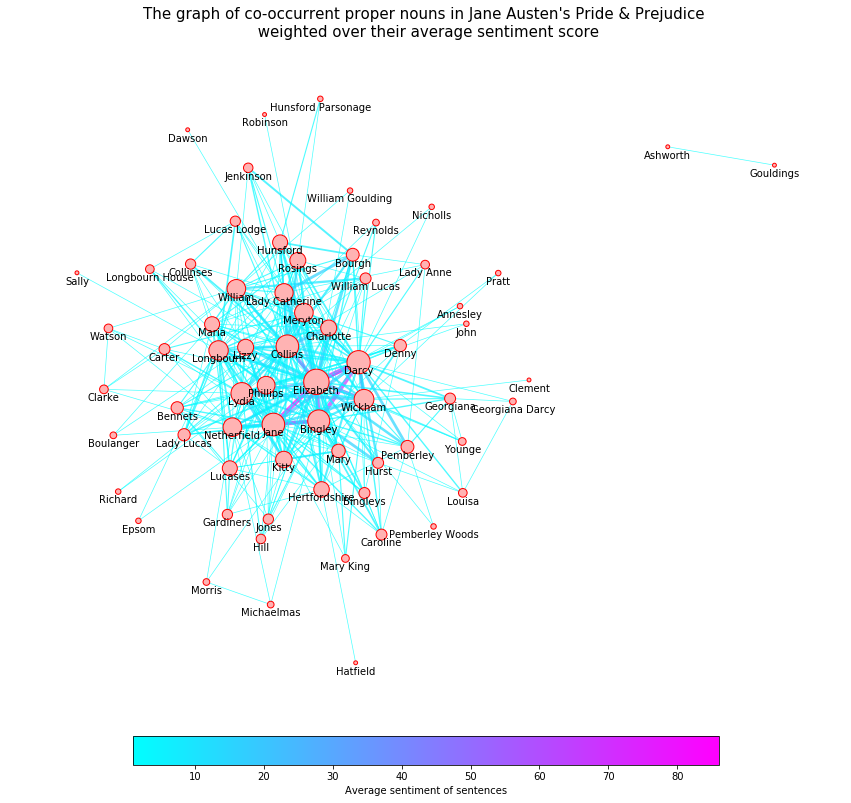

In [18]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[15*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)
pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.7)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of co-occurrent proper nouns in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

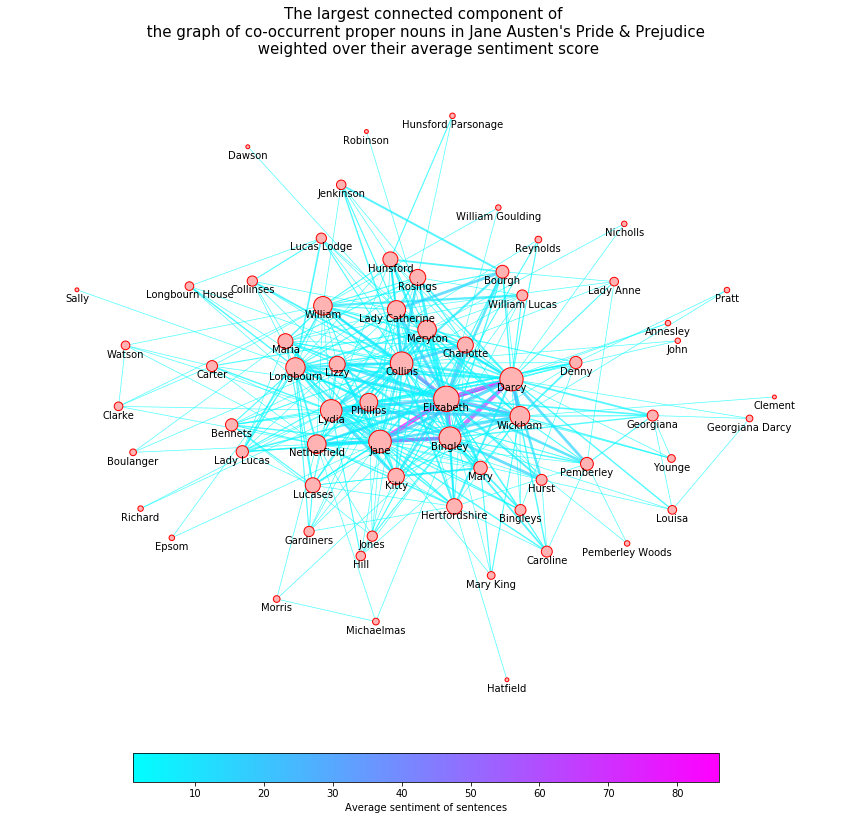

In [19]:
Gw=Gwlcc

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[15*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)
pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.7)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The largest connected component of \n the graph of co-occurrent proper nouns in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [20]:
print("Run in %.2f seconds (%.2f minutes)" %(time.time() - start_time,(time.time() - start_time)/60))

Run in 63.55 seconds (1.06 minutes)
